## Analisis de la Tasa de Homicidios en EEUU

In [1]:
# importamos librerias
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

### 1. Asignamos una apariencia general a los graficos

In [2]:
# muestra los graficos y los guarda en el Notebooks
%matplotlib inline

sns.set_style(style='whitegrid') #parametros del estilo general de los graficos
sns.set_context(context='notebook') #parametros de escala de los elementos del grafico
plt.rcParams['figure.figsize'] = (11, 9.4) #personaliza las propiedades y estilos de los graficos de matplotlib


### 2. Cargar Datos

In [3]:
state = pd.read_csv('state.csv')
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


### 3. Tipos de datos de cada variable

In [4]:
state.dtypes

State            object
Population        int64
Murder.Rate     float64
Abbreviation     object
dtype: object

Tanto states como Abbreviation son de datos categoricos de tipo string. Population es de tipo entero y Murder.Rate is numerico

### 4. Cantidad de variables de cada tipo de dato

In [5]:
(
    state
    .dtypes
    .value_counts()
)

object     2
int64      1
float64    1
dtype: int64

### 5. Cantidad de variables y registros en el dataset

In [6]:
state.shape

(50, 4)

### 6. Valores nulos en las variables

In [7]:
(
    state
    .isnull() # identifica los valores nulos
    .any()    # cuenta los valores dados por columna
)

State           False
Population      False
Murder.Rate     False
Abbreviation    False
dtype: bool

Claramente vemos que el dataset no posee valores nulos

### 7. Estadistica descriptiva de las variables categoricas 

In [8]:
state.describe(include='object') # estadistica descriptiva de los datos categoricos

,State,Abbreviation
count,50,50
unique,50,50
top,Alabama,AL
freq,1,1


### 8. Convertir las variables de tipo object en tipo category

In [9]:
(
    state
    .astype({
        'State':'category',
        'Abbreviation':'category'
    })
)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### 9. Estadistica descriptiva de las variables numerica

In [10]:
state.describe(include=[np.number]) 

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


### 10 Visualizar el Histograma de la Poblacion

Text(0.5, 0, 'Poblacion (Millones)')

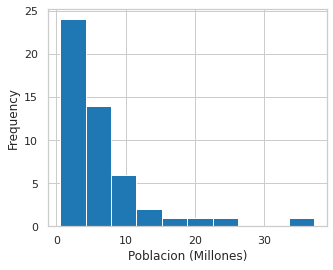

In [11]:
ax = (
        (state['Population']/1_000_000)
        .plot
        .hist(figsize=(5,4))
    )

ax.set_xlabel('Poblacion (Millones)')

De la grafica observamos que un grupo de estados tienen una poblacion de aproximadamente 24 millones

### 11. Visualizar la poblacion por cada estado 

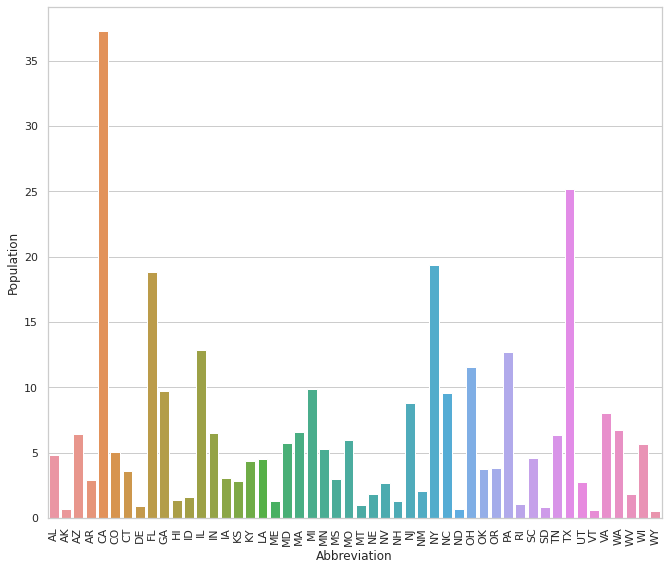

In [12]:
ax = sns.barplot(
    data=state,
    x='Abbreviation',
    y= state['Population']/1_000_000
    )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90
)

plt.show()

El Estado con mayor poblacion es California

### 12. Visualizar la tasa de homicidios por estado

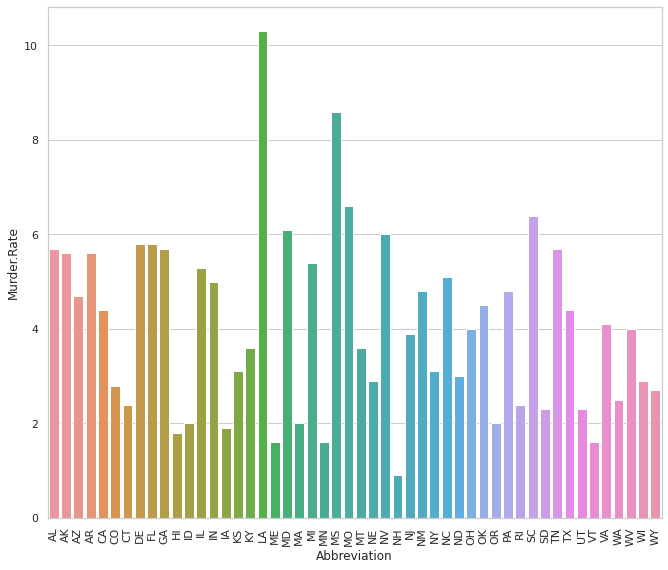

In [13]:
ax = sns.barplot(
    data=state,
    x='Abbreviation',
    y= 'Murder.Rate'
    )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90
)

plt.show()

### 13. Media de la Poblacion en General

In [14]:
# La media es sensible a outliers por lo que debemos utilizar un mejor estadistico
state['Population'].mean()

6162876.3

In [15]:
# La media recortada no toma en cuenta el 10% de los valores de cada extremo
# Lo que hace que sea mas resistente a outliers
from scipy.stats import trim_mean
trim_mean(state['Population'], 0.1)  # 0.1 --> 10%

4783697.125

In [16]:
# La mediana considera ese valor medio de los datos. Esto lo hace mucho mas resistentes
# a outliers
state['Population'].median()

4436369.5

Cuando estos tres estidisticos son iguales se dice que cada estado tiene en promedio la misma cantidad de poblacion. Sin embargo, vemos que los tres son diferentes, siendo la mediana el que describe mejor la realidad de los datos. Esto sugiere que los estados no tienen proporciones iguales de poblacion y que tal desproporcion podrian influenciar en el promedio del valor real en la tasa de homicidios

### 14. Media de la Tasa de Homicidios

In [17]:
# Obtenemos la media de la tasa de homicidios
state['Murder.Rate'].mean()

4.066

In [18]:
# Media ponderada utiliza un peso para cada valor y luego los promedia
#Para este caso, utlizamos como peso la poblacion segun el estado
# libreria numpy
np.average(state['Murder.Rate'], weights=state['Population']) 

4.445833981123393

In [19]:
# Mediana ponderada es el percentil ponderado del 50%. Es robusto frente a outliers
# Permite utilizar pesos no uniformes sobre los valores segun su relevancia
import wquantiles
wquantiles.median(state['Murder.Rate'], weights=state['Population']) 

4.4

De los resultados destacamos que la media ponderada arroja un valor que describe mejor la realidad ya que toma en cuenta la poblacion por estado. Amabas medidas, tanto la media como la mediana ponderada, son muy utiles para estos casos

### 15. Valor Maximo de cada Variable

In [20]:
# solo variables numericas
state.max(numeric_only=True)

Population     37253956.0
Murder.Rate          10.3
dtype: float64

### 16. Valor minimo  de las variables 

In [21]:
state.min(numeric_only=True)

Population     563626.0
Murder.Rate         0.9
dtype: float64

### 17 Rango de las variables

In [22]:
state.max(numeric_only=True) - state.min(numeric_only=True)

Population     36690330.0
Murder.Rate           9.4
dtype: float64

### 18. Desviacion Estandar de las variables

In [23]:
state.std(numeric_only=True)

Population     6.848235e+06
Murder.Rate    1.915736e+00
dtype: float64

In [24]:
#media de las variables
state.mean(numeric_only=True)

Population     6162876.300
Murder.Rate          4.066
dtype: float64

### 19. Rango que incluye el 65% de los datos 

In [25]:
rangeMin = state.mean(numeric_only=True) - state.std(numeric_only=True)
rangeMax = state.mean(numeric_only=True) + state.std(numeric_only=True)
print(rangeMin)
print(rangeMax)

Population    -685359.047401
Murder.Rate         2.150264
dtype: float64
Population     1.301111e+07
Murder.Rate    5.981736e+00
dtype: float64


El rango minimo de la Poblacion es negativo, lo que indica que la distribucion de los datos esta sesgada hacia la derecha: Rango Poblacion = (-685359.05, 13011111)

### 20. Rango Interquartilico (IQR) 50% de los Datos

In [31]:
#IQR de la poblacion
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

### 21. Tabla de IQR para cada variable

In [33]:
(
    state
    .quantile([0.75,0.50,0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,iqr
0,Population,6680312.25,4436369.5,1833004.250,4847308.000
1,Murder.Rate,5.55,4.0,2.425,3.125


De los resultados vemos que el cuartil 0.50 en la poblacion es de 4436369.5 mientras que la media es de 6162876.3 lo que confirma que la distribuciom esta sesgada hacia la derecha. En el caso de la tasa de homcidios coinciden los valores del cuartil 0.50 y la media.

### 22. Desviacion Absoluta de la Mediana (MAD)

In [35]:
# La MAD es una extension de la mediana de la varianza absoluta
# Es la mediana de los valores absolutos de las desviaciones de la mediana de los datos
# es robusta frente a outliers
from statsmodels import robust
MAD = robust.scale.mad(state['Population']) 

La MAD es mucho menor que la std. Esto permite que la MAD sea mucho mas efectiva en la deteccion de outliers. Para ello calculamos un nuevo rango con la MAD

In [36]:
rangeMin = state['Population'].mean() - MAD
rangeMax = state['Population']. mean() + MAD
print(f'Rango para Deteccion de Outliers: ({rangeMin} , {rangeMax})')

Rango para Deteccion de Outliers: (2313000.1540020662 , 10012752.445997933)


Si es una distribucion Normal, todos los valores fuera de ese rango se consideran outliers.
Sin embargo, por la grafica anterior sabemos que no es Normal